In [1]:
#Importing Relevant Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
#Reading CSV File
a = pd.read_csv(r"/Users/harshavardhan/Desktop/archive/Admission_Predict.csv")
a

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [4]:
#Displaying first 5 Rows
a.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
#Dropping Serial Name column
a.drop('Serial No.', axis=1, inplace=True)
a.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
#Converting the values in "Chance of Admit" column in Yes/No form
a['Chance of Admit ']= [1 if each >0.75 else 0 for each in a['Chance of Admit ']]
a.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [7]:
#Splitting the Data
x = a[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = a[['Chance of Admit ']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [8]:
#Importing Decison Tree Classifier
from sklearn.tree import DecisionTreeClassifier
csf = DecisionTreeClassifier(max_depth=2)

In [9]:
#Creating the Classifier
csf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [10]:
#Creating the Prediction 
y_prediction = csf.predict(x_test)
y_prediction

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [11]:
#Importing Plot Tree 
from sklearn.tree import plot_tree
column = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']
column 

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR',
 'CGPA',
 'Research']

In [12]:
import matplotlib.pyplot as plt

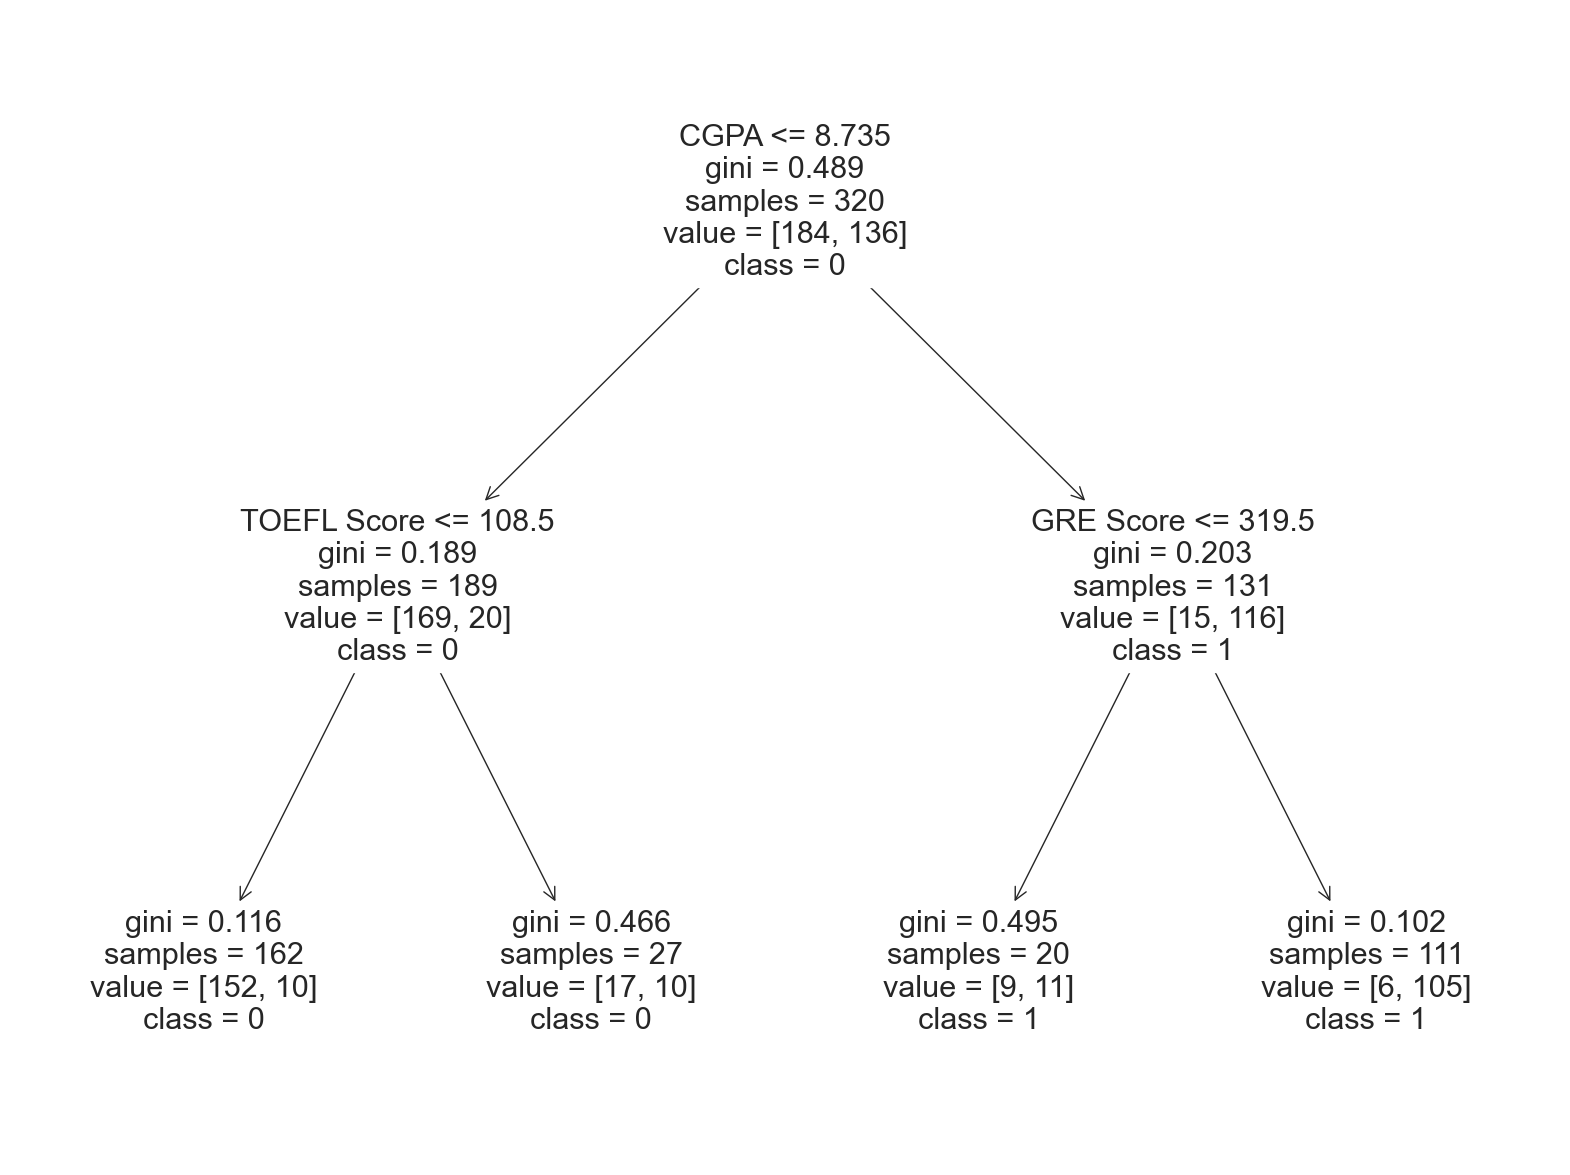

In [13]:
#Creating the Decision Tree
plt.figure(figsize=(20,15))
sns.set_style('whitegrid')
plot_tree(csf,
         feature_names=column,
         max_depth=2,
         class_names=['0','1'],
         filled = False,
         rounded = False,
         fontsize=22)

plt.savefig('decision.png')

In [14]:
#Importing and displaying Classification Report
from sklearn.metrics import classification_report
classification_report(y_test,y_prediction)

'              precision    recall  f1-score   support\n\n           0       0.89      0.91      0.90        44\n           1       0.89      0.86      0.87        36\n\n    accuracy                           0.89        80\n   macro avg       0.89      0.89      0.89        80\nweighted avg       0.89      0.89      0.89        80\n'

In [21]:
#Importing relevant Libraries
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [25]:
#Displaying The values of the report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        44
           1       0.89      0.86      0.87        36

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80



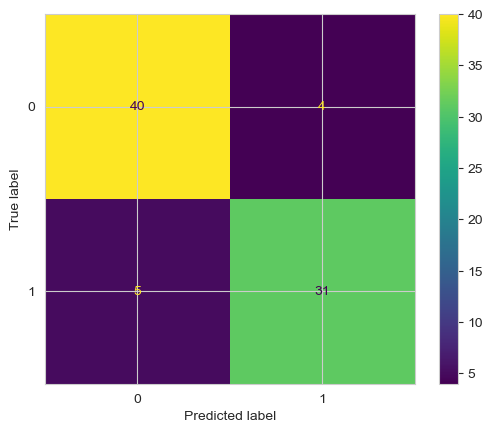

In [26]:
ConfusionMatrixDisplay.from_predictions(y_test,y_prediction)